In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [3]:
df = pd.read_csv('google_places_data.csv')

In [4]:
train_df, test1_df = train_test_split(df, test_size=0.3, random_state=42)

test_df, val_df= train_test_split(test1_df, test_size=0.4, random_state=42)

# Data overview

This dataset is from Kaggle 'Location Intelligence Data' 

We have 46 more and less relevant features, which are:

1) business_id : unique google identifier for each business
2) phone_number : phone number associated with the business
3) name : the official name of the company on google maps
4) full_address: full postal address of the company
5) **latitude** and **longitude** : geographic coordinates
6) **review_count** and user_ratings_total (probably redundant) : total number of reviews on google
7) **rating** and google_rating (probably redundant) : user scale rating out of 5
8) **timezone** 
9) website : offical URL website
10) **category** : category of the business like restaurant, museum ...
11) claim_status: Indicates whether the business listing has been claimed by the owner on Google Maps
12) **plus_code** : A short code representing the area where the business is located, used for addressing without a street address
13) Columns like weekday_daytime : flag 0-1 indicating whether the business is operating at this time
14) **geo_cluster** : clustering identifier used to group similar businesses based on geographic or other clustering algorithms
15) **city**
16) **state**
16) veryfied 
17) **country** : country where business is located




### **Potential business goal**

Classify businesses "successiblity" and ability to continue functioning. We can sell the data to bigger corporations/individuals who are planning to invest in the region, specific countries or businesses.

For example, we will say what is the predicted business time of existence + profitability over the time (how much time it will continue providing their services, and their profitability)

* potential problem (question) - we don't have data for profitability and times of business existence - can we predict them without having them?

Another goal suggestion (paraphrasing?) - you're opening a spot, and you want to know how successful it's going to be. It's predicted "successibility" should be classified

In [5]:
df.columns

Index(['business_id', 'phone_number', 'name', 'full_address', 'latitude',
       'longitude', 'review_count', 'rating', 'timezone', 'website',
       'place_id', 'place_link', 'types', 'Friday', 'Saturday', 'Sunday',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'city', 'verified',
       'state', 'Friday_morning', 'Friday_afternoon', 'Friday_evening',
       'Saturday_morning', 'Saturday_afternoon', 'Saturday_evening',
       'Sunday_morning', 'Sunday_afternoon', 'Sunday_evening',
       'Monday_morning', 'Monday_afternoon', 'Monday_evening',
       'Tuesday_morning', 'Tuesday_afternoon', 'Tuesday_evening',
       'Wednesday_morning', 'Wednesday_afternoon', 'Wednesday_evening',
       'Thursday_morning', 'Thursday_afternoon', 'Thursday_evening',
       'geo_cluster', 'country'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15203 entries, 0 to 15202
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   business_id          15203 non-null  object 
 1   phone_number         15203 non-null  object 
 2   name                 15203 non-null  object 
 3   full_address         15203 non-null  object 
 4   latitude             15198 non-null  float64
 5   longitude            15198 non-null  float64
 6   review_count         15203 non-null  float64
 7   rating               15203 non-null  float64
 8   timezone             15203 non-null  object 
 9   website              15203 non-null  object 
 10  place_id             15203 non-null  object 
 11  place_link           15203 non-null  object 
 12  types                15203 non-null  object 
 13  Friday               15203 non-null  object 
 14  Saturday             15203 non-null  object 
 15  Sunday               15203 non-null 

In [7]:
df.head(10)

,business_id,phone_number,name,full_address,latitude,longitude,review_count,rating,timezone,website,...,Tuesday_afternoon,Tuesday_evening,Wednesday_morning,Wednesday_afternoon,Wednesday_evening,Thursday_morning,Thursday_afternoon,Thursday_evening,geo_cluster,country
0,0x3e6751d65629cb05:0x27cbb7ddadc7008c,Unknown,حصن الظفرة Al Dhafra Fort,PXMJ+H7J حصن الظفرة Al Dhafra Fort - Unnamed R...,23.733973,53.980629,58.0,4.7,Asia/Dubai,Unknown,...,0,0,0,0,0,0,0,0,0.0,United Arab Emirates
1,0x3e675d61493af035:0xa4f20f24f9e8beb7,971569049905,Rafiullah,MP4R+WQJ Rafiullah - Zayed City - Abu Dhabi - ...,23.657332,53.741881,3.0,3.0,Asia/Dubai,Unknown,...,1,1,1,1,1,1,1,1,0.0,United Arab Emirates
2,0x3e91f7041ac64d33:0x6120c5af14b63b93,96822081500,National Museum of Oman,"National Museum of Oman, opposite Al Alam Pala...",23.611601,58.593728,3499.0,4.6,Asia/Muscat,https://www.nm.gov.om/,...,0,0,0,0,0,0,0,0,0.0,Oman
3,0x487bb1e7815c44db:0x417132a42bd93ef6,443300580058,Science and Industry Museum,"Science and Industry Museum, Liverpool Rd, Man...",53.477136,-2.254582,17398.0,4.4,Europe/London,https://www.scienceandindustrymuseum.org.uk/,...,0,0,0,0,0,0,0,0,2.0,United Kingdom
4,0x487e78e1955eb419:0x4c55c87f0a46d173,441913704000,"Beamish, the Living Museum of the North","Beamish, the Living Museum of the North, Stanl...",54.884752,-1.659321,21957.0,4.8,Europe/London,https://www.beamish.org.uk/,...,0,0,0,0,0,0,0,0,2.0,United Kingdom
5,0x4870bc8c914c47a3:0x66e3b59f807e9444,441213488000,Birmingham Museum & Art Gallery,"Birmingham Museum & Art Gallery, Chamberlain S...",52.480111,-1.903462,8266.0,4.5,Europe/London,https://www.birminghammuseums.org.uk/birmingha...,...,0,0,0,0,0,0,0,0,2.0,United Kingdom
6,0x47d870963894862d:0x7c69bf53a1c0382d,442070913067,IWM Duxford,"IWM Duxford, IWM Duxford Airfield, Cambridge C...",52.096465,0.136480,16076.0,4.8,Europe/London,http://www.iwm.org.uk/visits/iwm-duxford,...,0,0,0,0,0,0,0,0,2.0,United Kingdom
7,0x394f21c4a3ba4d1b:0xfc12611877494d81,92405454554,Umerkot Fort Museum,"9P7P+4QG Umerkot Fort Museum, Moolchand Khati ...",25.364313,69.734297,473.0,4.1,Asia/Karachi,Unknown,...,0,0,0,0,0,0,0,0,0.0,Pakistan
8,0x488845d16be594e9:0x5258b27cf1ca9ffe,441412769599,Kelvingrove Art Gallery and Museum,"Kelvingrove Art Gallery and Museum, Argyle St,...",55.868589,-4.290604,19689.0,4.7,Europe/London,https://www.glasgowlife.org.uk/museums/venues/...,...,0,0,0,0,0,0,0,0,2.0,United Kingdom
9,0x487099fc92a3ad61:0x80fb90ace73738fb,441215579643,Black Country Living Museum,"Black Country Living Museum, Discovery Wy, Dud...",52.519917,-2.075433,11394.0,4.7,Europe/London,https://bclm.com/,...,0,0,0,0,0,0,0,0,2.0,United Kingdom


We can see that although the number of NaN values is 0 there are some missing values represented as "Unknown"

In [8]:
len(df[df['website']=='Unknown'])

6256

Columns that are potentially irrelevant:
* business_id : it's unique for every business
* website URL : every business has it's own website, many missing values
* phone_number : same as before

# EDA

In [9]:
df['country'].describe()

count                    15203
unique                     194
top       United Arab Emirates
freq                      9614
Name: country, dtype: object

In [10]:
df['city'].describe()

count     15203
unique     1964
top       Dubai
freq       6105
Name: city, dtype: object

In [11]:
df['timezone'].describe()

count          15203
unique           112
top       Asia/Dubai
freq            9383
Name: timezone, dtype: object

In [12]:
df['types'].describe()

count     15203
unique     4130
top       Hotel
freq        406
Name: types, dtype: object

In [13]:
df['types'].unique()

array(['Museum', 'National museum, Museum, Tourist attraction',
       'Science museum, Heritage museum, Museum, Tourist attraction', ...,
       'Car rental agency, Auto body parts supplier, Auto parts store, Building materials supplier, Car dealer, Car rental, Cars, Car stereo store, Industrial equipment supplier',
       'Car rental agency, Car rental', 'Van rental agency'], dtype=object)

Many types are very similar like : Car rental agency, car rental, Cars etc. Meybe it would be usefull to group them

**Maps**

In [14]:
coord_df = df.dropna(subset=['latitude','longitude'])

c:\Users\rogal\anaconda3\Lib\site-packages\cartopy\mpl\geoaxes.py:1683: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  result = super().scatter(*args, **kwargs)


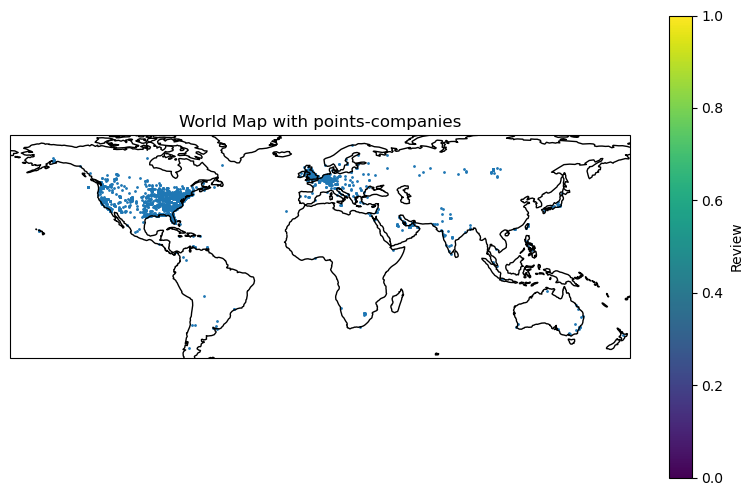

In [15]:
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines
ax.coastlines()

# Plot points colored by review ratings
sc = ax.scatter(coord_df['longitude'], coord_df['latitude'], cmap='viridis', s=1, transform=ccrs.PlateCarree())

# Add colorbar
plt.colorbar(sc, label='Review')
plt.title('World Map with points-companies')
plt.show()

In [16]:
 #checking for errors with Arab Emirates - they appear on the map in different countries
d1 = df[df['longitude']<0]
d1[d1['country']=='United Arab Emirates']

,business_id,phone_number,name,full_address,latitude,longitude,review_count,rating,timezone,website,...,Tuesday_afternoon,Tuesday_evening,Wednesday_morning,Wednesday_afternoon,Wednesday_evening,Thursday_morning,Thursday_afternoon,Thursday_evening,geo_cluster,country
3427,0x87528b177a41efad:0x48edd010179794d0,13852348031,"Laundry Service, SLC",Unknown,40.668008,-111.906702,33.0,5.0,America/Denver,http://laundryserviceslc.com/,...,0,0,0,0,0,0,0,0,3.0,United Arab Emirates
3464,0x88569101a9bc392d:0x92f2bb060b4d1070,19804988979,Your Laundry is Done,Unknown,35.169449,-80.839829,5.0,5.0,America/New_York,http://yourlaundryisdone.com/,...,0,0,0,0,0,0,0,0,1.0,United Arab Emirates
3474,0x88388ebe44d44c2f:0x754cfa1092a82a64,18008256553,Push Laundry - Columbus,Unknown,39.969036,-83.011352,19.0,3.3,America/New_York,https://www.pushlaundry.com/locations/columbus,...,0,0,0,0,0,0,0,0,1.0,United Arab Emirates
4492,0x8b0b8e042b19856b:0x44a22fbbb6a64213,18448337302,Reliable Insurance Managers,Unknown,46.423669,-129.942709,32.0,4.4,America/Detroit,http://www.reliableins.net/,...,0,0,0,0,0,0,0,0,3.0,United Arab Emirates
5227,0x8ba9f7e168cd86a3:0x3ff46d6ba4890c0f,12232376369,Underground Painting,Unknown,40.251349,-76.938912,13.0,5.0,America/New_York,https://m.facebook.com/people/Underground-Pain...,...,0,0,0,0,0,0,0,0,1.0,United Arab Emirates
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12510,0xa6c514b6da6e154d:0x849181878e4bb4b,13162026521,Pinelux Exteriors LLC,Unknown,38.299141,-97.482226,32.0,4.4,America/Chicago,https://www.pinelux.com/,...,0,0,0,0,0,0,0,0,1.0,United Arab Emirates
12531,0x6dc8e1a355ac6913:0xeff4521bda05033c,15095916010,J.A.T Roofing,Unknown,46.197467,-119.177030,32.0,4.4,America/Los_Angeles,Unknown,...,0,0,0,0,0,0,0,0,3.0,United Arab Emirates
14520,0x5351e55555555555:0xaca8f930348fe1bb,13073447381,Yellowstone National Park,Yellowstone National Park,44.427963,-110.588455,39647.0,4.8,America/Denver,https://www.nps.gov/yell/index.htm,...,1,1,1,1,1,1,1,1,3.0,United Arab Emirates
14952,0x4a9b1871b7f1d55f:0x25641b6292767dc6,Unknown,AutoSlash,Unknown,46.423669,-129.942709,299.0,4.8,America/Detroit,https://www.autoslash.com/,...,1,1,1,1,1,1,1,1,3.0,United Arab Emirates


**Important observation: the 'country' column may have some mistakes. Many rows which are in USA (long, lat and timezone) have a contry UAE**

In [17]:
d =coord_df[(coord_df['latitude']>22) & (coord_df['latitude']<26)]
d2=d[(d['longitude']>51) & (d['longitude']<56)]
d2

,business_id,phone_number,name,full_address,latitude,longitude,review_count,rating,timezone,website,...,Tuesday_afternoon,Tuesday_evening,Wednesday_morning,Wednesday_afternoon,Wednesday_evening,Thursday_morning,Thursday_afternoon,Thursday_evening,geo_cluster,country
0,0x3e6751d65629cb05:0x27cbb7ddadc7008c,Unknown,حصن الظفرة Al Dhafra Fort,PXMJ+H7J حصن الظفرة Al Dhafra Fort - Unnamed R...,23.733973,53.980629,58.0,4.7,Asia/Dubai,Unknown,...,0,0,0,0,0,0,0,0,0.0,United Arab Emirates
1,0x3e675d61493af035:0xa4f20f24f9e8beb7,971569049905,Rafiullah,MP4R+WQJ Rafiullah - Zayed City - Abu Dhabi - ...,23.657332,53.741881,3.0,3.0,Asia/Dubai,Unknown,...,1,1,1,1,1,1,1,1,0.0,United Arab Emirates
98,0x3e5f5d8a0c23d6a5:0x390706dd82704d3f,97146999832,Dubai police Museum - متحف شرطة دبي,79H4+H4J Dubai police Museum - متحف شرطة دبي -...,25.278807,55.355861,1.0,5.0,Asia/Dubai,Unknown,...,0,0,0,0,0,0,0,0,0.0,United Arab Emirates
99,0x3e5f5ba78c7400e3:0x9c28bb839a247d8,97165222002,Sharjah Maritime Museum,"Sharjah Maritime Museum, https://maps.app.goo....",25.331463,55.358635,760.0,4.4,Asia/Dubai,https://www.sharjahmuseums.ae/en-US/Museums/Sh...,...,0,0,0,0,0,0,0,0,0.0,United Arab Emirates
100,0x3e5f43544c19b4a1:0xda309bc04dc5ffe1,97143573999,Museum Of Illusions,7873+RP9 Museum Of Illusions - Al Seef - Dubai...,25.264473,55.303994,4050.0,4.2,Asia/Dubai,http://www.museumofillusions.ae/,...,0,0,0,0,0,0,0,0,0.0,United Arab Emirates
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15198,0x3e5f59c4dab7eff3:0x89fae07c807d4c5f,Unknown,Safari Rent A Car,9CVM+833 Safari Rent A Car - Al Rashidiya 3 - ...,25.393262,55.432665,32.0,4.4,Asia/Dubai,Unknown,...,0,0,0,0,0,0,0,0,0.0,United Arab Emirates
15199,0x3e5f595110611ba5:0xb6cd7ca953dec16,Unknown,IQRA CARS SPARE PARTS,IQRA CARS SPARE PARTS - Shop #01 - Ajman Indus...,25.377181,55.464124,32.0,4.4,Asia/Dubai,Unknown,...,0,0,0,0,0,0,0,0,0.0,United Arab Emirates
15200,0x3e5f584795807779:0x649b125cfbb4af24,97167406863,London Rent A Car,9FQ5+RWM London Rent A Car - Al Rashidiya 1 - ...,25.389579,55.459804,32.0,4.4,Asia/Dubai,Unknown,...,0,0,0,0,0,0,0,0,0.0,United Arab Emirates
15201,0x3e5f61040c475cd7:0xb9e710d1665cd4ff,Unknown,Akbar family guest house,Akbar family guest house - Morocco G2 - Intern...,25.163250,55.418791,32.0,4.4,Asia/Dubai,Unknown,...,0,0,0,0,0,0,0,0,0.0,United Arab Emirates


There are more than 9000 companies that are in UAE according to the latitude and longitude (it is not exact), our df has circa 15 000 rows so despite a few errors the majority of companies are in Emirates

## Maps

In [31]:
def plot_world(color_columns):
    fig, axes = plt.subplots(2,2,figsize=(15,6), subplot_kw={'projection': ccrs.PlateCarree()})
    for ax, column in zip(axes.flat, color_columns):
        ax.coastlines()
        sc = ax.scatter(coord_df['longitude'], coord_df['latitude'],c=coord_df[column], cmap='viridis', s=1, transform=ccrs.PlateCarree())
        plt.colorbar(sc, label=f'{column}')
        ax.set_title('World Map with '+f'{column}')
    plt.show()

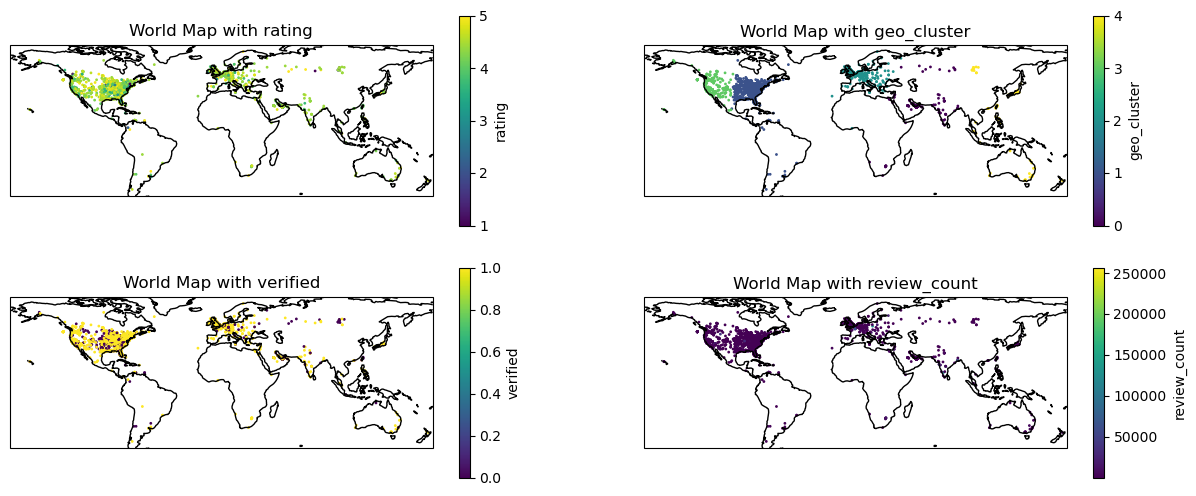

In [32]:
plot_world(['rating','geo_cluster','verified','review_count'])

Let's zoom on every continent, maybe we will see some patterns

In [33]:
def draw_map(color_columns, boundries):
    fig, axes = plt.subplots(2,2, figsize=(15,6),subplot_kw={'projection': ccrs.PlateCarree()})

    for ax, column in zip(axes.flat, color_columns):
        ax.coastlines()
        ax.set_extent(boundries)
        sc = ax.scatter(coord_df['longitude'], coord_df['latitude'], c= coord_df[column],cmap='viridis', s=1, transform=ccrs.PlateCarree())

        plt.colorbar(sc, label=f'{column}')
        ax.set_title('Map with '+f'{column}')
    plt.show()

## USA maps

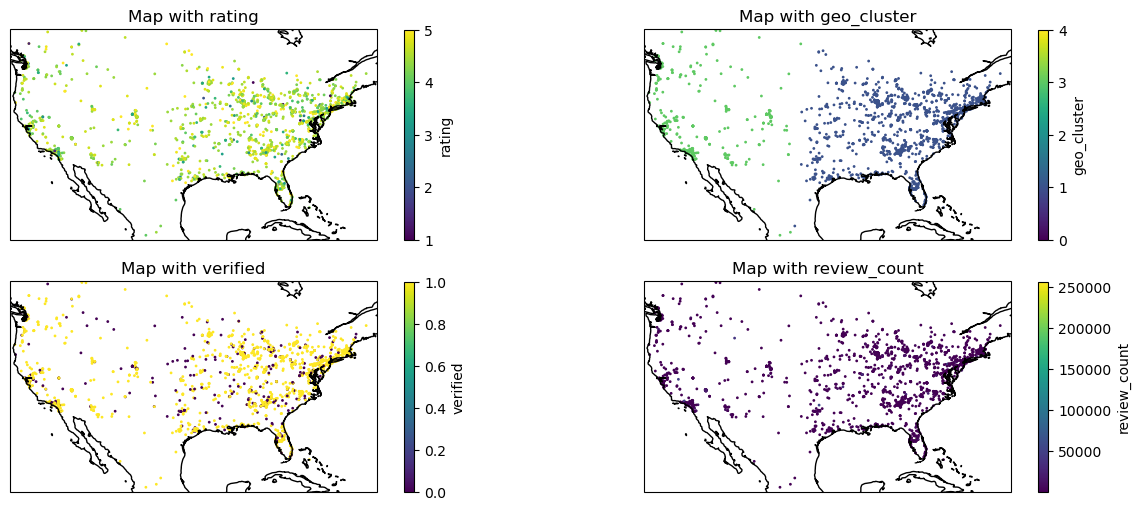

In [34]:
draw_map(['rating','geo_cluster','verified','review_count'], [-125, -66.5, 20, 50]) # USA

Observations:
* The majority of companies are on the east side
* There are not many observations with bad reviews
* all companies have <= 50k reviews
* more unverified comanies are on the east side

## Europe maps

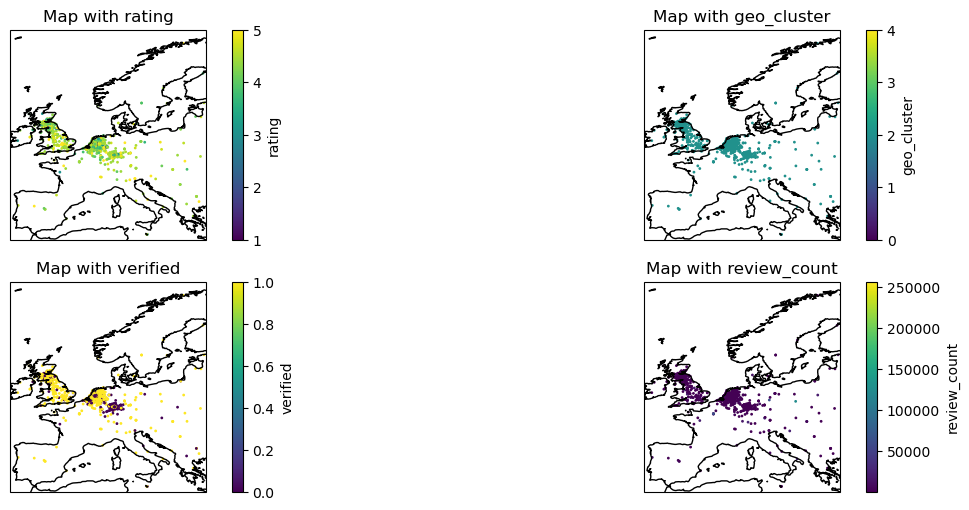

In [35]:
draw_map(['rating','geo_cluster','verified','review_count'],[-10, 25, 35, 72] )

For companies in Europe we have observed:
* most of them have <50k reviews
* most companies are on north-west and GB
* They have good (4-5 stars) reviews
* All of them have the same geo_cluster identifier
* We can see that the most copanies in middle-europe are unverified and in west verified
* there are not many companies in the east part of Europe

## West Asia maps

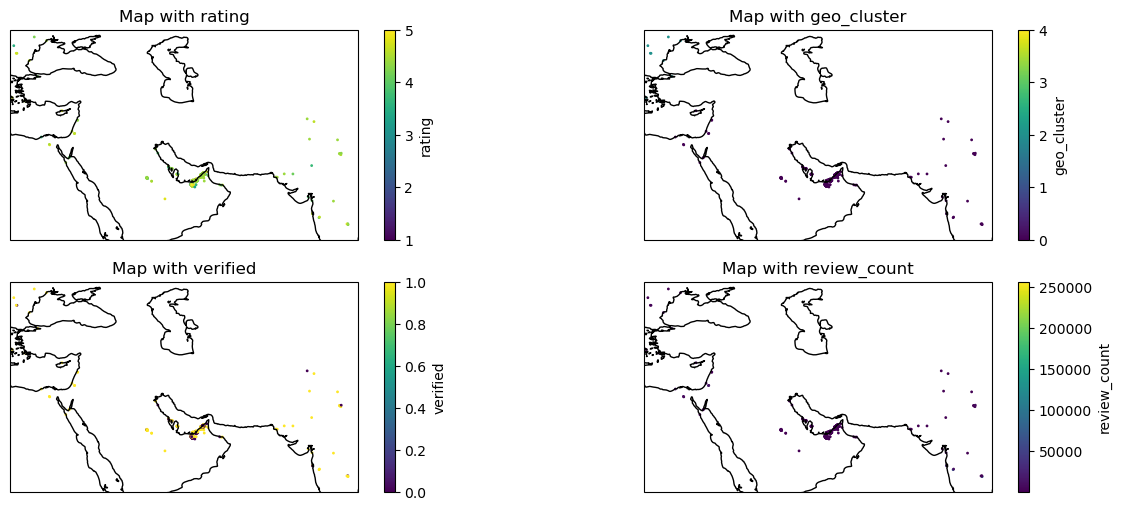

In [36]:
draw_map(['rating','geo_cluster','verified','review_count'],[25, 80, 15, 45] )

There are not many points, let's zoom on UAE

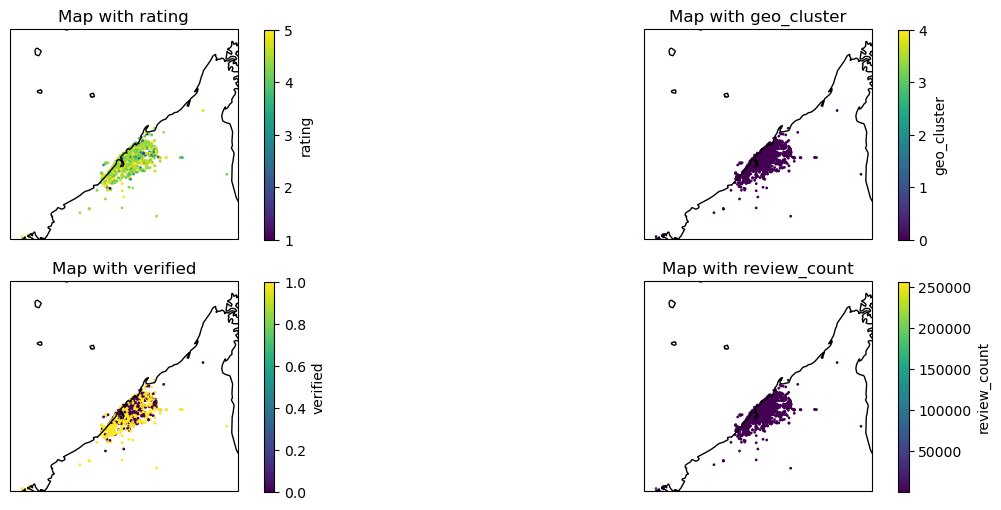

In [37]:
draw_map(['rating','geo_cluster','verified','review_count'],[54.25, 56.4167, 24.5, 26.5])

Observations:
* there are many companies near each other
* most of them have good ratings and have less than 50k reviews
* there are some unverified companies

## Asia maps

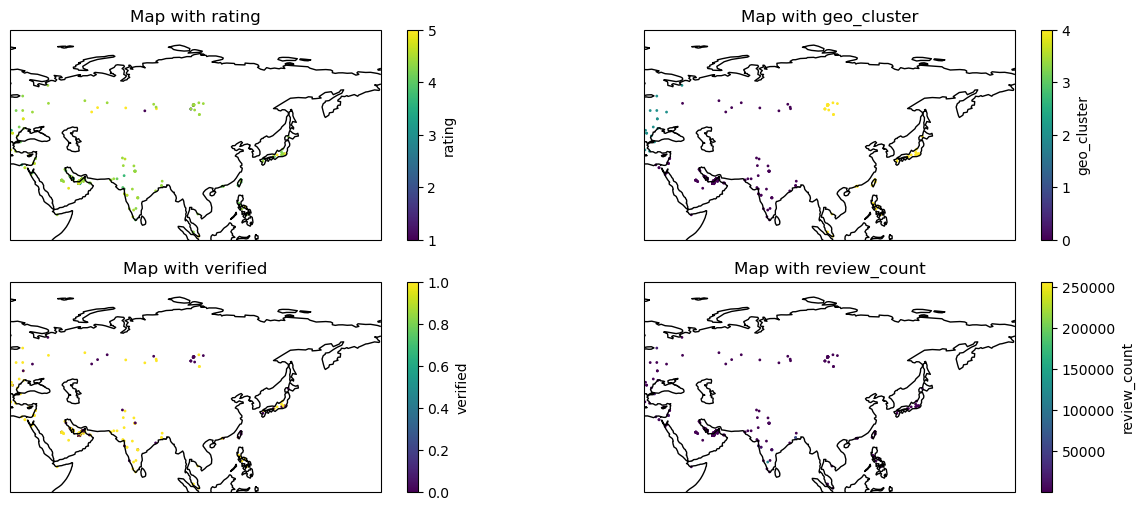

In [38]:
draw_map(['rating','geo_cluster','verified','review_count'],[25, 180, 0, 80])

Observations:
* someone created two clusters: west and east asia
* companies are on the north or south, not many in the middle (mountains) + japan
* there are more unverified companies in the north part
* there isn't an obvious pattern

## Australia maps

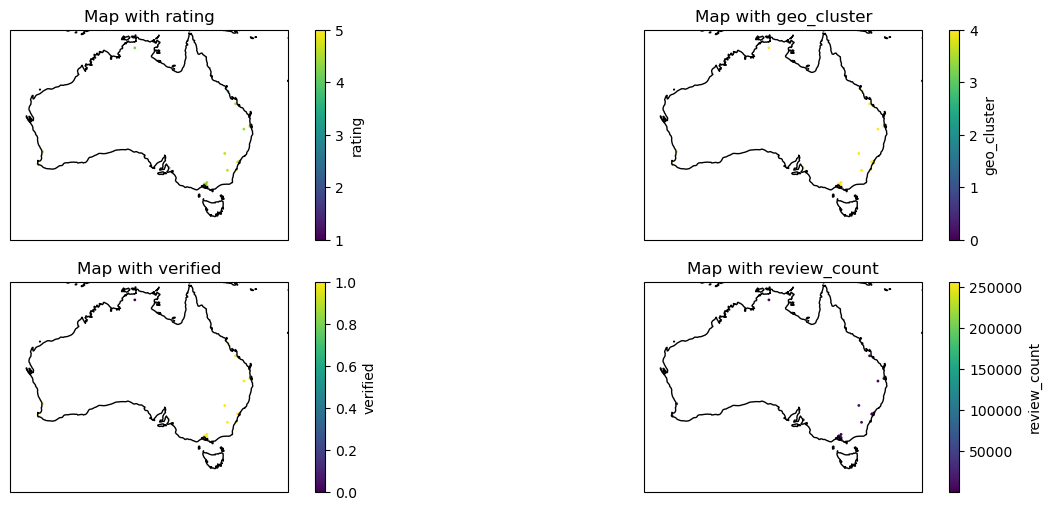

In [39]:
draw_map(['rating','geo_cluster','verified','review_count'],[110, 160, -45, -10])

There are very few companies in Australia, they are in the same cluster as east Asia

##

**Observations from maps:**
* the majority of companies are in West Asia
* Most of the companies have good ratings
* There are very few companies in east Asia,Australia, Africa and South America
* There is no clear pattern (except from geo_cluster which somebody grouped before)

## Potential correlations (regarding business goal)

In [40]:
df11 = df[['rating','geo_cluster']]
average_values_mean = df11.groupby('geo_cluster').mean()
average_values_median = df11.groupby('geo_cluster').median()

print("Mean avg ranking", average_values_mean, end = "\n\n")
print("Median avg ranking", average_values_median)

Mean avg ranking                rating
geo_cluster          
0.0          4.266600
1.0          4.418067
2.0          4.280892
3.0          4.347870
4.0          4.240777

Median avg ranking              rating
geo_cluster        
0.0             4.4
1.0             4.5
2.0             4.4
3.0             4.4
4.0             4.4


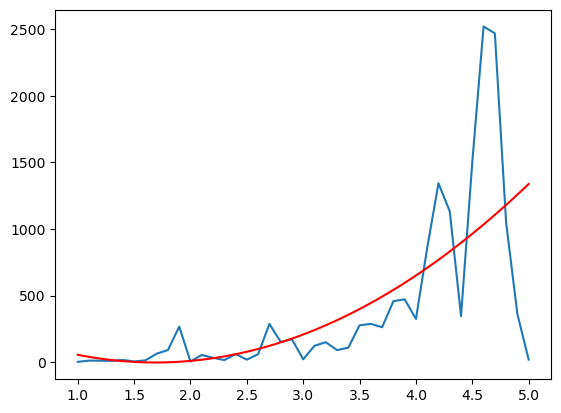

In [41]:
df11 = df[['rating','review_count']]
average_values_mean = df11.groupby('rating').mean()

z = np.polyfit(x=average_values_mean.index, y=average_values_mean['review_count'], deg=2)
p = np.poly1d(z)

x_trendline = np.linspace(average_values_mean.index.min(), average_values_mean.index.max(), 100)
y_trendline = p(x_trendline)

plt.plot(average_values_mean,label='Rating vs Review count')
plt.plot(x_trendline, y_trendline, color='red', label='Trendline')
plt.show()


In [8]:
df44 = df[['rating','website']]
df44.loc[df44['website'] != 'Unknown', 'website'] = 'Known'

average_values_mean = df44.groupby('website').mean()
average_values_mean

,rating
website,
Known,4.318408
Unknown,4.243095


**Observations**

* Business without website have slightly lower rating
* The bigger is the review count (number), the better is the ranking
* Geo cluster 1 has the best reviews (ranking), this cluster is for east american establishments

## Feature engineering

In [45]:
df['Known_Website'] = df["website"].apply(lambda x: 0 if x == "Unknown" else 1)  # new column 1 - if there is a website, 0 if not

In [50]:
df['Known_phone'] = df["phone_number"].apply(lambda x: 0 if x == "Unknown" else 1) # new column 1 if there is a phone number, 0 if not

Let's try to extract keywords from column Types (? for later)

In [64]:
import spacy
nlp = spacy.load("en_core_web_sm")

def extraxt_keyword(text):
    doc = nlp(text.lower())
    keywords = [token.lemma_ for token in doc if token.pos_ in ["NOUN","PROPN"]]
    return keywords

df['types'].apply(extraxt_keyword)


0                                              [museum]
1                                              [museum]
2       [national, museum, museum, tourist, attraction]
3     [science, museum, heritage, museum, museum, to...
4      [open, air, museum, museum, tourist, attraction]
                            ...                        
95    [museum, art, museum, library, tourist, attrac...
96                        [museum, tourist, attraction]
97    [heritage, museum, art, museum, museum, touris...
98                                             [museum]
99    [museum, maritime, museum, museum, tourist, at...
Name: types, Length: 100, dtype: object